## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

## Loading the dataset & checking if the target column is balanced

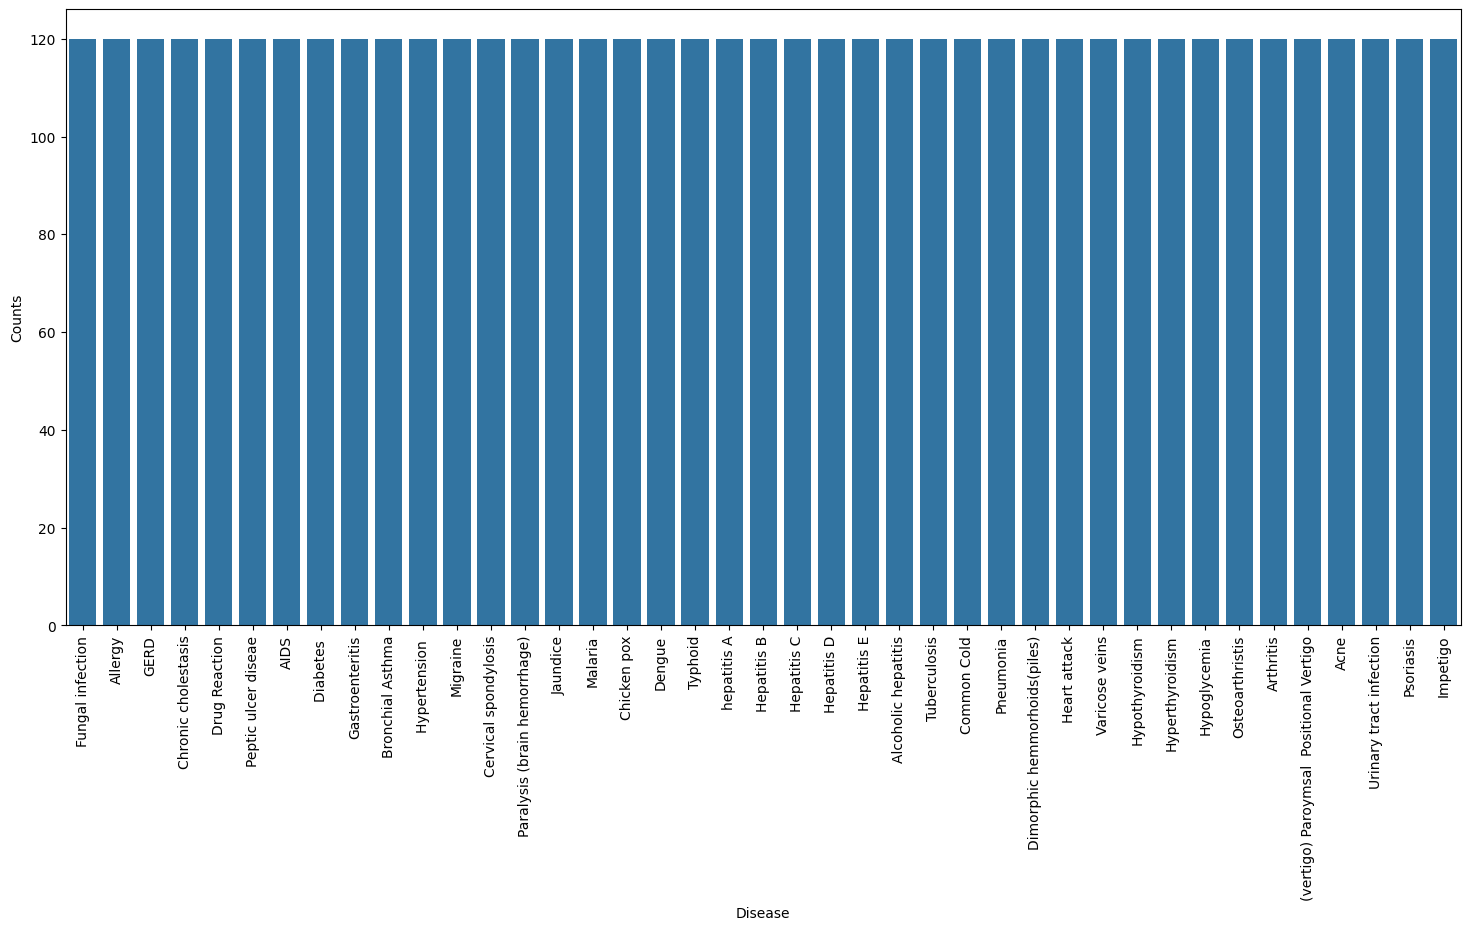

In [2]:
# Loads the data and removes the last column since it is empty
data = pd.read_csv("dataset/Training.csv").dropna(axis=1)

# Checking whether the data is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

## LabelEncoding the target column 

In [3]:
encoder  = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

## Splitting the data for training and testing the model

In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Train: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Train: (984, 132), (984,)


## K-fold Cross Validation for model selection

In [5]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing models
models = {
    "SVC": SVC(),
    "GaussianNB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state = 18)
}

# Producing cross validation scores for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(f"{model_name}")
    print(f"Scores: {scores}")
    print(f"Mean Scores: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Scores: 1.0
GaussianNB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Scores: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Scores: 1.0


## Training and Testing all Models

Accuracy on training data by SVM Classifier      : 100.0
Accuracy on testing data by SVM Classifier      : 100.0


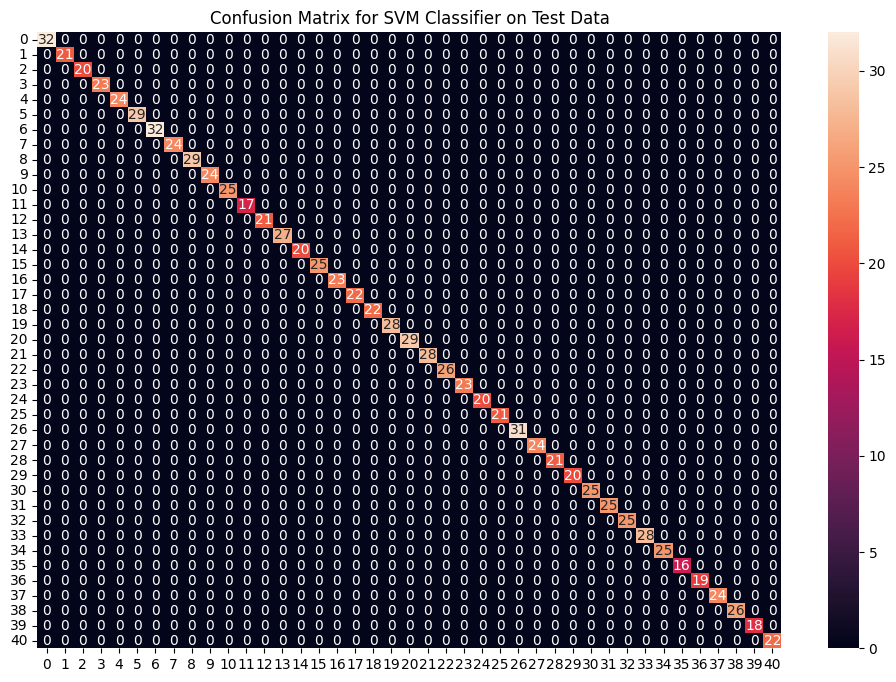

Accuracy on training data by Naive Bayes Classifier      : 100.0
Accuracy on testing data by Naive Bayes Classifier      : 100.0


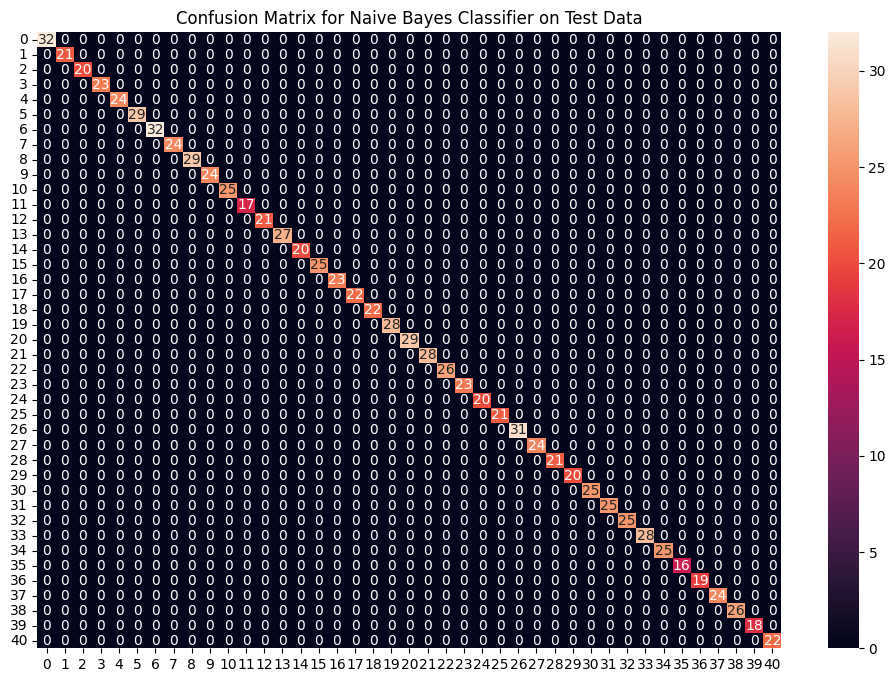

Accuracy on training data by Naive Bayes Classifier      : 100.0
Accuracy on testing data by Naive Bayes Classifier      : 100.0


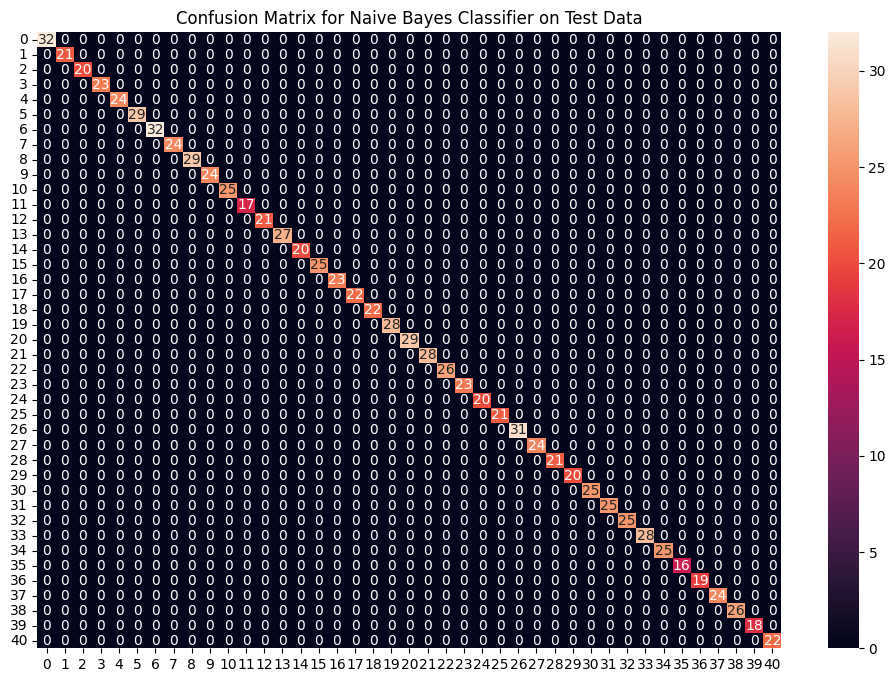

In [6]:
# Training and Testing SVM Classsifier
svc = SVC()
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)

print(f"Accuracy on training data by SVM Classifier\
      : {accuracy_score(y_train, svc.predict(X_train))*100}")

print(f"Accuracy on testing data by SVM Classifier\
      : {accuracy_score(y_test, svc_preds)*100}")

cf_matrix = confusion_matrix(y_test, svc_preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and Testing Naive Bayes Classsifier
nbc = GaussianNB()
nbc.fit(X_train, y_train)
nbc_preds = nbc.predict(X_test)

print(f"Accuracy on training data by Naive Bayes Classifier\
      : {accuracy_score(y_train, nbc.predict(X_train))*100}")

print(f"Accuracy on testing data by Naive Bayes Classifier\
      : {accuracy_score(y_test, nbc_preds)*100}")

cf_matrix = confusion_matrix(y_test, nbc_preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and Testing Random Forest Classsifier
rfc = RandomForestClassifier(random_state=18)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)

print(f"Accuracy on training data by Naive Bayes Classifier\
      : {accuracy_score(y_train, rfc.predict(X_train))*100}")

print(f"Accuracy on testing data by Naive Bayes Classifier\
      : {accuracy_score(y_test, rfc_preds)*100}")

cf_matrix = confusion_matrix(y_test, nbc_preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

## Final training and testing of models

c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-pa

Accuracy on Test dataset by the combined model      : 100.0


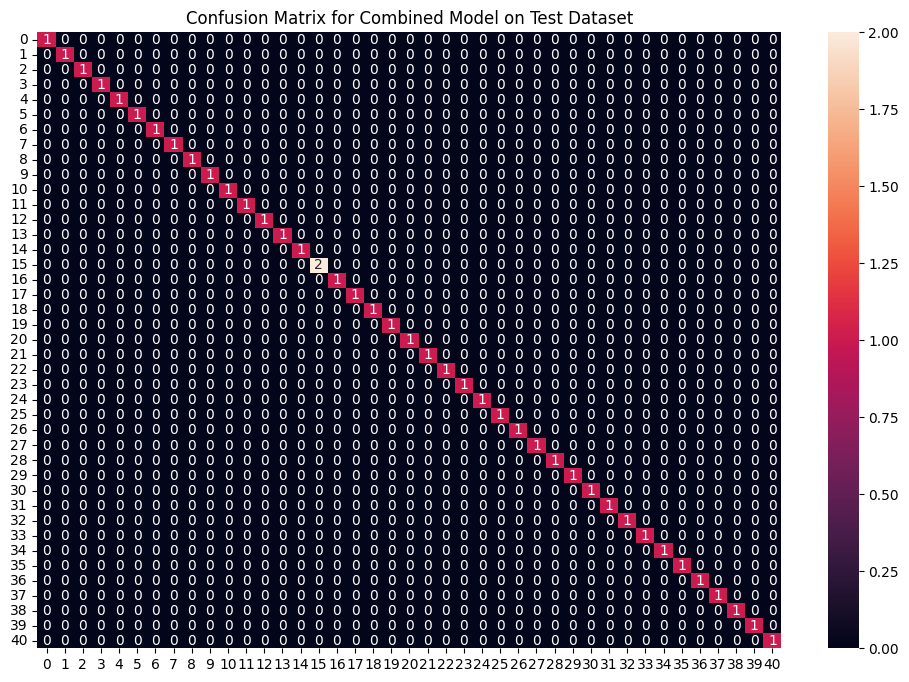

In [7]:
# Training the models on Training.csv
final_svc = SVC()
final_nbc = GaussianNB()
final_rfc = RandomForestClassifier()
final_svc.fit(X, y)
final_nbc.fit(X, y)
final_rfc.fit(X, y)

# Reading the test data
test_data = pd.read_csv("./dataset/Testing.csv")

test_X = test_data.iloc[:, :-1]
test_y = encoder.transform(test_data.iloc[:, -1])

# Combining predictions of all the models
final_svc_preds = final_svc.predict(test_X)
final_nbc_preds = final_nbc.predict(test_X)
final_rfc_preds = final_rfc.predict(test_X)

final_preds = [mode([[i,j,k]])[0][0] for i,j, 
               k in zip(final_svc_preds, final_nbc_preds, final_rfc_preds)] 

print(f"Accuracy on Test dataset by the combined model\
      : {accuracy_score(test_y, final_preds)*100}")

cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

## Defining a function that takes symptoms as input and generates predictions for disease

In [ ]:
  
# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms, model):
    
    symptoms_data = X.columns.values
  
    # Creating a symptom index dictionary to encode the 
    # input symptoms into numerical form
    symptom_index = {} 
    for index, value in enumerate(symptoms_data): 
        symptom = " ".join([i.capitalize() for i in value.split("_")])
        print(symptom)
        symptom_index[symptom] = index 
    
    data_dict = { 
        "symptom_index":symptom_index, 
        "predictions_classes":encoder.classes_ 
    }

    symptoms = symptoms.split(",") 
      
    # creating input data for the models 
    input_data = [0] * len(data_dict["symptom_index"]) 
    for symptom in symptoms: 
        index = data_dict["symptom_index"][symptom] 
        input_data[index] = 1
          
    # reshaping the input data and converting it 
    # into suitable format for model predictions 
    input_data = np.array(input_data).reshape(1,-1) 
      
    # generating individual outputs 
    rfc_prediction = data_dict["predictions_classes"][model.predict(input_data)[0]] 
    nbc_prediction = data_dict["predictions_classes"][model.predict(input_data)[0]] 
    svm_prediction = data_dict["predictions_classes"][model.predict(input_data)[0]] 
    
    predictions = { 
        "rf_model_prediction": rfc_prediction, 
        "naive_bayes_prediction": nbc_prediction,
        "svm_model_prediction": svm_prediction,
    }
    
    return predictions

# List of symptoms: itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
  
# Testing the function 
print(predictDisease("Itching,Skin Rash", final_svc))
print(predictDisease("Shivering,Chills", final_nbc))
print(predictDisease("Fatigue,Vomiting,Anxiety", final_rfc))


Itching
Skin Rash
Nodal Skin Eruptions
Continuous Sneezing
Shivering
Chills
Joint Pain
Stomach Pain
Acidity
Ulcers On Tongue
Muscle Wasting
Vomiting
Burning Micturition
Spotting  urination
Fatigue
Weight Gain
Anxiety
Cold Hands And Feets
Mood Swings
Weight Loss
Restlessness
Lethargy
Patches In Throat
Irregular Sugar Level
Cough
High Fever
Sunken Eyes
Breathlessness
Sweating
Dehydration
Indigestion
Headache
Yellowish Skin
Dark Urine
Nausea
Loss Of Appetite
Pain Behind The Eyes
Back Pain
Constipation
Abdominal Pain
Diarrhoea
Mild Fever
Yellow Urine
Yellowing Of Eyes
Acute Liver Failure
Fluid Overload
Swelling Of Stomach
Swelled Lymph Nodes
Malaise
Blurred And Distorted Vision
Phlegm
Throat Irritation
Redness Of Eyes
Sinus Pressure
Runny Nose
Congestion
Chest Pain
Weakness In Limbs
Fast Heart Rate
Pain During Bowel Movements
Pain In Anal Region
Bloody Stool
Irritation In Anus
Neck Pain
Dizziness
Cramps
Bruising
Obesity
Swollen Legs
Swollen Blood Vessels
Puffy Face And Eyes
Enlarged Thyroi

c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.wa

## Create a Model file to store the Model

In [16]:
import pickle

# Save the file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(final_svc, file)

In [17]:
## Loading model from the saved file
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predictVal = predictDisease("Itching,Skin Rash", model)
print(predictVal)

Itching
Skin Rash
Nodal Skin Eruptions
Continuous Sneezing
Shivering
Chills
Joint Pain
Stomach Pain
Acidity
Ulcers On Tongue
Muscle Wasting
Vomiting
Burning Micturition
Spotting  urination
Fatigue
Weight Gain
Anxiety
Cold Hands And Feets
Mood Swings
Weight Loss
Restlessness
Lethargy
Patches In Throat
Irregular Sugar Level
Cough
High Fever
Sunken Eyes
Breathlessness
Sweating
Dehydration
Indigestion
Headache
Yellowish Skin
Dark Urine
Nausea
Loss Of Appetite
Pain Behind The Eyes
Back Pain
Constipation
Abdominal Pain
Diarrhoea
Mild Fever
Yellow Urine
Yellowing Of Eyes
Acute Liver Failure
Fluid Overload
Swelling Of Stomach
Swelled Lymph Nodes
Malaise
Blurred And Distorted Vision
Phlegm
Throat Irritation
Redness Of Eyes
Sinus Pressure
Runny Nose
Congestion
Chest Pain
Weakness In Limbs
Fast Heart Rate
Pain During Bowel Movements
Pain In Anal Region
Bloody Stool
Irritation In Anus
Neck Pain
Dizziness
Cramps
Bruising
Obesity
Swollen Legs
Swollen Blood Vessels
Puffy Face And Eyes
Enlarged Thyroi

c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abhis\miniconda3\envs\dpred_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
